In [65]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.signal import convolve2d

In [ ]:
import session_info
session_info.show()

### Edge Detection

Edge detection is an image processing technique for finding the boundaries of objects within images. It works by detecting discontinuities in brightness. Edge detection is used for image segmentation and data extraction in areas such as image processing, computer vision, and machine vision.

Edges are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. There are three types of edges: 

    Horizontal edges
    Vertical edges
    Diagonal edges

### Sobel Operator
The sobel is one of the most commonly used edge detectors. It is based on convolving the image with a small, separable, and integer valued filter in horizontal and vertical direction and is therefore relatively inexpensive in terms of computations. The Sobel edge enhancement filter has the advantage of providing differentiating (which gives the edge  response) and smoothing (which reduces noise) concurrently. in th followinf kernels $G_x$ is the vertical mask and $G_y$ is the horizontal mask.

$$G_x = \begin{bmatrix} 1 & 0 & -1  \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$$

$$G_y = \begin{bmatrix} 1 & 2 & 1  \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$


Sobel operator returns edges at points where the gradient of image intensity is maximum. Locations whose gradient value
exceeds some threshold are declared edge locations, When we apply this mask on the image it prominent vertical edges. It simply works like as first order derivate and calculates the difference of pixel intensities in a edge region.

As the center column is of zero so it does not include the original values of an image but rather it calculates the difference of right and left pixel values around that edge. Also the center values of both the first and third column is 2 and -2 respectively.

Sobel Algorithm
The Sobel algorithm can be summarized in four steps:

    Converting the image into grayscale
    Convolving the gray image with Sobel-x filter
    Convolving the gray image with Sobel-y filter
    Calculating the gradient magnitude and direction

In [ ]:
filename = 'face_1_3.jpeg'
image = cv2.imread(filename)
image_array = np.array(image)
grayscale_image = rgb2gray(image_array)

In [8]:

def rgb2gray(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

In [10]:
def sobel_edge_detection(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    height, width = image.shape
    Gx = np.zeros_like(image)
    Gy = np.zeros_like(image)
    edges = np.zeros_like(image)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            Gx[y, x] = (sobel_x * image[y-1:y+2, x-1:x+2]).sum()
            Gy[y, x] = (sobel_y * image[y-1:y+2, x-1:x+2]).sum()
            edges[y, x] = np.sqrt(Gx[y, x] ** 2 + Gy[y, x] ** 2)

    return edges

In [24]:

# Perform Sobel edge detection grayscale_image

edges_sobel = sobel_edge_detection(grayscale_image)

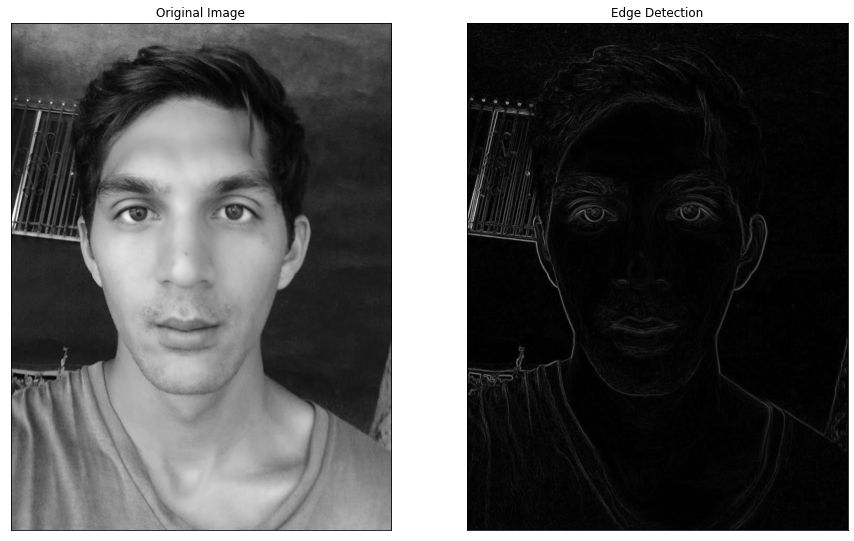

In [25]:
# Visualize the original image and the detected edges

plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

### Prewitt’s Operator
Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images.
Prewitt method finds edges using thePrewitt approximation to the derivative and returns edges at those points where gradient of image intensity is maximum.  However, unlike the Sobel, this operator does not place any emphasis on the pixels that are closer to the center of the mask. in th followinf kernels $G_x$ is the vertical mask and $G_y$ is the horizontal mask.

$$G_x = \begin{bmatrix} 1 & 0 & -1  \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$

$$G_y = \begin{bmatrix} 1 & 1 & 1  \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}$$

In [26]:
filename = 'face_1_3.jpeg'
image = cv2.imread(filename)
image_array = np.array(image)
grayscale_image = rgb2gray(image_array)

In [27]:
def prewitt_edge_detection(image):
    prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    height, width = image.shape
    Gx = np.zeros_like(image)
    Gy = np.zeros_like(image)
    edges = np.zeros_like(image)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            Gx[y, x] = (prewitt_x * image[y-1:y+2, x-1:x+2]).sum()
            Gy[y, x] = (prewitt_y * image[y-1:y+2, x-1:x+2]).sum()
            edges[y, x] = np.sqrt(Gx[y, x] ** 2 + Gy[y, x] ** 2)

    return edges

In [28]:
edges_prewitt = prewitt_edge_detection(grayscale_image)

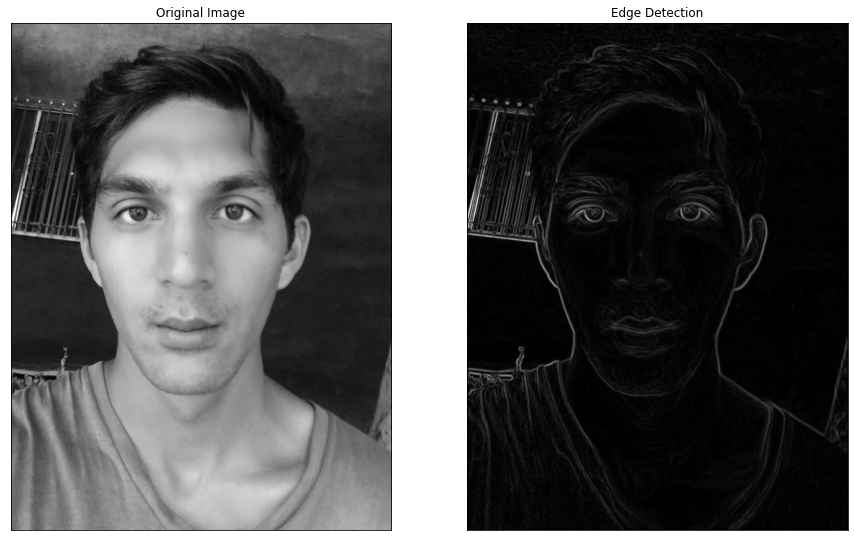

In [22]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges_prewitt, cmap='gray')
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

### Laplacian Operator
Laplacian method searches for zero crossings in the second derivative of the image to find
edges since the second derivative is zero when the first derivative is at maximum .
However, this method is sensitive to noise, which should be filtered out before edge
detection. Based on the filter used, the two methods namely Laplacian & Gaussian and Zero
crossing are more popular and these are based on Gaussian filter and specified filter
respectively

Unlike the Sobel and Prewitt’s edge detectors, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass. Two commonly used small kernels are:

$$G_x = \begin{bmatrix} 0 & -1 & 0  \\ -1 & -4 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$

$$G_y = \begin{bmatrix} -1 & -1 & -1  \\ -1 & -8 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$

In [45]:

def laplacian_edge_detection(image):
    # Convert image to grayscale
    #gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    # Define Laplacian kernel
    kernel1 = np.array([[0, -1, 0],
                       [-1, -4, -1],
                       [0, -1, 0]])
    kernel2 = np.array([[-1, -1, -1],
                       [-1, -8, -1],
                       [-1, -1, -1]])

    # Apply Laplacian edge detection algorithm
    edges = ndimage.convolve(image, kernel1)

    # Convert the output back to uint8 format
    edges = np.uint8(np.absolute(edges))

    return edges


In [62]:
def laplacian_edge_detection(image):
    # Define the Laplacian filter
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

    # Convolve the image with the Laplacian kernel
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')

    # Threshold the filtered image to obtain binary edges
    threshold = 0
    edges = np.zeros_like(filtered_image)
    edges[filtered_image > threshold] = 1

    return edges




In [66]:
edges_laplacian = laplacian_edge_detection(grayscale_image)

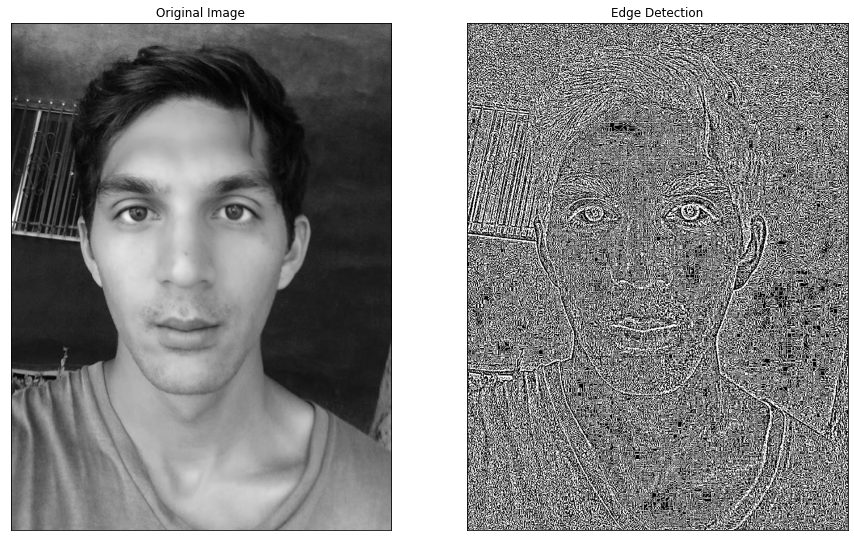

In [67]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges_laplacian, cmap='gray')
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

### Canny Edge Detector

The Canny edge detector is considered as the standard
methodology of edge detection. and it finds edges by looking for local maxima of the
gradient of Image. The gradient is calculated using the derivative of a Gaussian filter and
the detected edges are refined with non-maximal suppression and hysteresis. This method
uses two thresholds to detect strong and weak edges, and includes the weak edges in the
output only if they are connected to strong edges. This method is therefore less likely than the
others to be "fooled" by noise and more likely to detect true weak edges.

Steps of Canny edge detector is as follows:

    1. Smooth the image with a Gaussian filter to reduce noise.
    2. Compute gradient of using any of the gradient operators Sobel or Prewitt.
    3. Extract edge points: Non-maximum suppression.
    4. Linking and thresholding: Hysteresis
    
The Canny technique produces smoother edges due to the implementation of Non-maxima suppression and thresholding. The downside of the Canny algorithm is that it is more complex and less time-efficient than Sobel. Knowing these differences is helpful in deciding which technique is better for a particular application.    
    
For further read : https://github.com/lina-haidar/Edge-Detection-Techniques-Sobel-vs.-Canny    

In [49]:
def gaussian_filter(shape, sigma=1):
    m, n = [(s-1)/2 for s in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2*sigma*sigma))
    h[h < np.finfo(h.dtype).eps*h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [50]:
def convolve(image, kernel):
    return ndimage.filters.convolve(image, kernel)

In [51]:
def gradient(image):
    kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    fx = convolve(image, kernel)
    fy = convolve(image, np.flip(kernel.T, axis=0))
    magnitude = np.sqrt(np.square(fx) + np.square(fy))
    magnitude *= 255.0 / magnitude.max()
    theta = np.arctan2(fy, fx)
    return magnitude, theta

In [52]:
def non_max_suppression(magnitude, theta):
    height, width = magnitude.shape
    suppressed = np.zeros((height, width))
    angle = theta * 180.0 / np.pi
    angle[angle < 0] += 180

    for y in range(1, height-1):
        for x in range(1, width-1):
            q = 255
            r = 255
            
            if (0 <= angle[y,x] < 22.5) or (157.5 <= angle[y,x] <= 180):
                q = magnitude[y, x+1]
                r = magnitude[y, x-1]
            elif 22.5 <= angle[y,x] < 67.5:
                q = magnitude[y+1, x-1]
                r = magnitude[y-1, x+1]
            elif 67.5 <= angle[y,x] < 112.5:
                q = magnitude[y+1, x]
                r = magnitude[y-1, x]
            elif 112.5 <= angle[y,x] < 157.5:
                q = magnitude[y-1, x-1]
                r = magnitude[y+1, x+1]
            
            if (magnitude[y,x] >= q) and (magnitude[y,x] >= r):
                suppressed[y,x] = magnitude[y,x]
            else:
                suppressed[y,x] = 0

    return suppressed

In [53]:
def double_threshold(image, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    high_threshold = image.max() * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    height, width = image.shape
    result = np.zeros((height, width), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_y, strong_x = np.where(image >= high_threshold)
    zeros_y, zeros_x = np.where(image < low_threshold)

    weak_y, weak_x = np.where((image <= high_threshold) & (image >= low_threshold))

    result[strong_y, strong_x] = strong
    result[weak_y, weak_x] = weak

    return result, weak, strong

In [56]:
def hysteresis(image, weak, strong=255):
    height, width = image.shape

    for y in range(1, height-1):
        for x in range(1, width-1):
            if image[y, x] == weak:
                if (image[y+1, x-1] == strong) or (image[y+1, x] == strong) or (image[y+1, x+1] == strong) \
                        or (image[y, x-1] == strong) or (image[y, x+1] == strong) \
                        or (image[y-1, x-1] == strong) or (image[y-1, x] == strong) or (image[y-1, x+1] == strong):
                    image[y, x] = strong
                else:
                    image[y, x] = 0

    return image

In [57]:
def canny(image, sigma=1, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    height, width = image.shape
    blurred = convolve(image, gaussian_filter((3,3), sigma))
    magnitude, theta = gradient(blurred)
    suppressed = non_max_suppression(magnitude, theta)
    thresholded, weak, strong = double_threshold(suppressed, low_threshold_ratio, high_threshold_ratio)
    hysteresis_image = hysteresis(thresholded, weak, strong)
    return hysteresis_image


In [59]:
edges_canny = canny(grayscale_image)

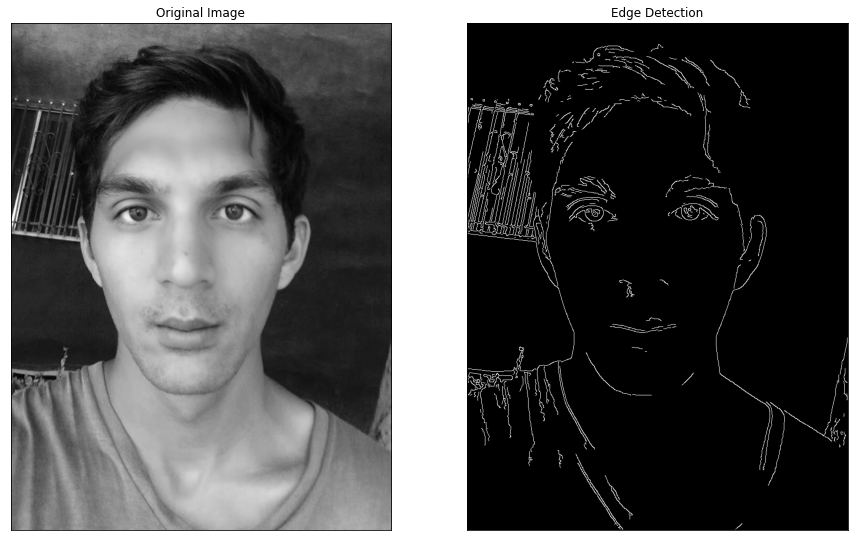

In [61]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges_canny, cmap='gray')
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

However, the most commonly used edge detection techniques are Gradient-based and Laplacian based Edge Detection. Gradient-based algorithms such as the Prewitt, Sobel. prewitt filter have a major drawback of being very sensitive to noise. Canny’s edge detection algorithm is computationally more expensive as compared to Sobel, Prewitt and Robert’s
operator. The Canny’s Edge detection method give better results in color images as well as in gray level images .Canny edge detection algorithm performs better than all these operators under almost all scenarios

### References

[1] Gonzales, R.C. and Wintz, P., 1987. Digital image processing. Addison-Wesley Longman Publishing Co., Inc..

[2]  https://github.com/lina-haidar/Edge-Detection-Techniques-Sobel-vs.-Canny
    